# Лабораторная работа по модулю "Математика и статистика в Python"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import statistics
%matplotlib inline

#### **01. Загрузить файл auto.csv**

In [3]:
data = pd.read_csv('auto.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
# импорт необходимых пакетов
import pandas as pd
import pandas_profiling
# df = pd.read_csv('titanic/train.csv')
pandas_profiling.ProfileReport(data)

F:\Python\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,26
Number of observations,205
Total Missing (%),0.0%
Total size in memory,41.8 KiB
Average record size in memory,208.6 B
Numeric,15
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [6]:
profile = pandas_profiling.ProfileReport(data)
profile.to_file(outputfile="Titanic data profiling.html")

F:\Python\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


#### **02. Рассчитать основные статистики для переменных(среднее,медиана, мода, мин/макс, сред. отклонение)**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-nu

In [6]:
# Рассчитаем основные показатели
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# Отдельно посчитаем моду.
data.select_dtypes(include='object').mode()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi


#### **03. Рассчитать и визуализировать корреляционную матрицу для переменных**

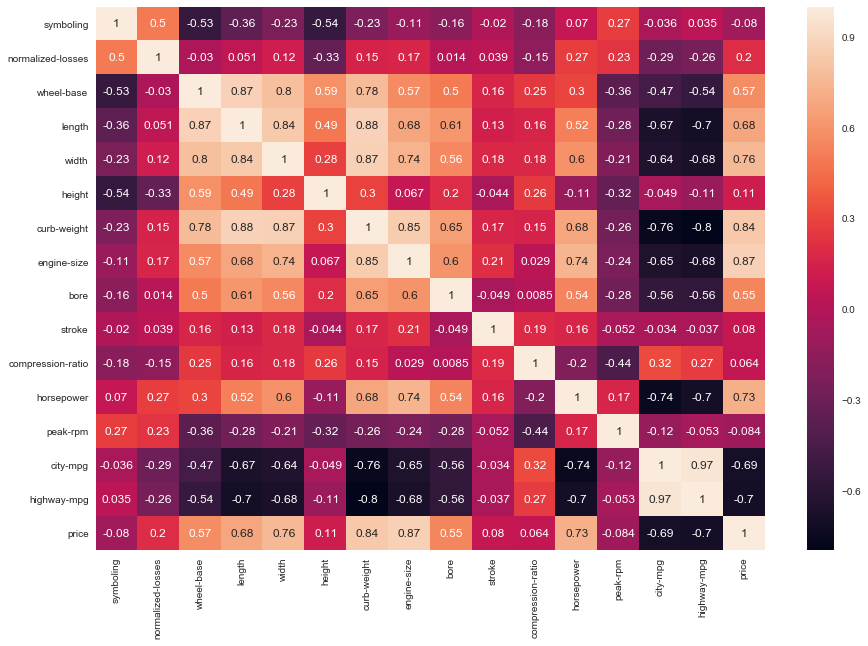

In [8]:
sns.set(rc=({'figure.figsize':(15, 10)}))
sns.heatmap(data.corr(), annot=True, xticklabels=data.corr().columns.values, yticklabels=data.corr().columns.values)

### **04. Визуализировать распределение переменной ‘Price’,рассчитать показатели skewness и kurtosis**

F:\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


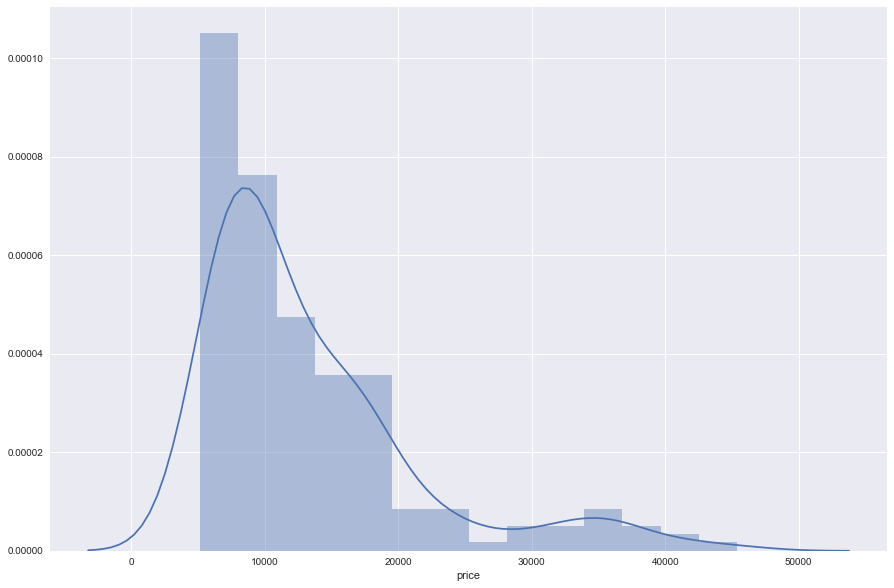

In [9]:
sns.distplot(data['price'])

In [10]:
# skewness
data['price'].skew()

1.7663998888191028

In [11]:
# kurtosis
data['price'].kurtosis() 

2.948637293212561

### **05. Визуализировать несколько взаимосвязей между переменными**

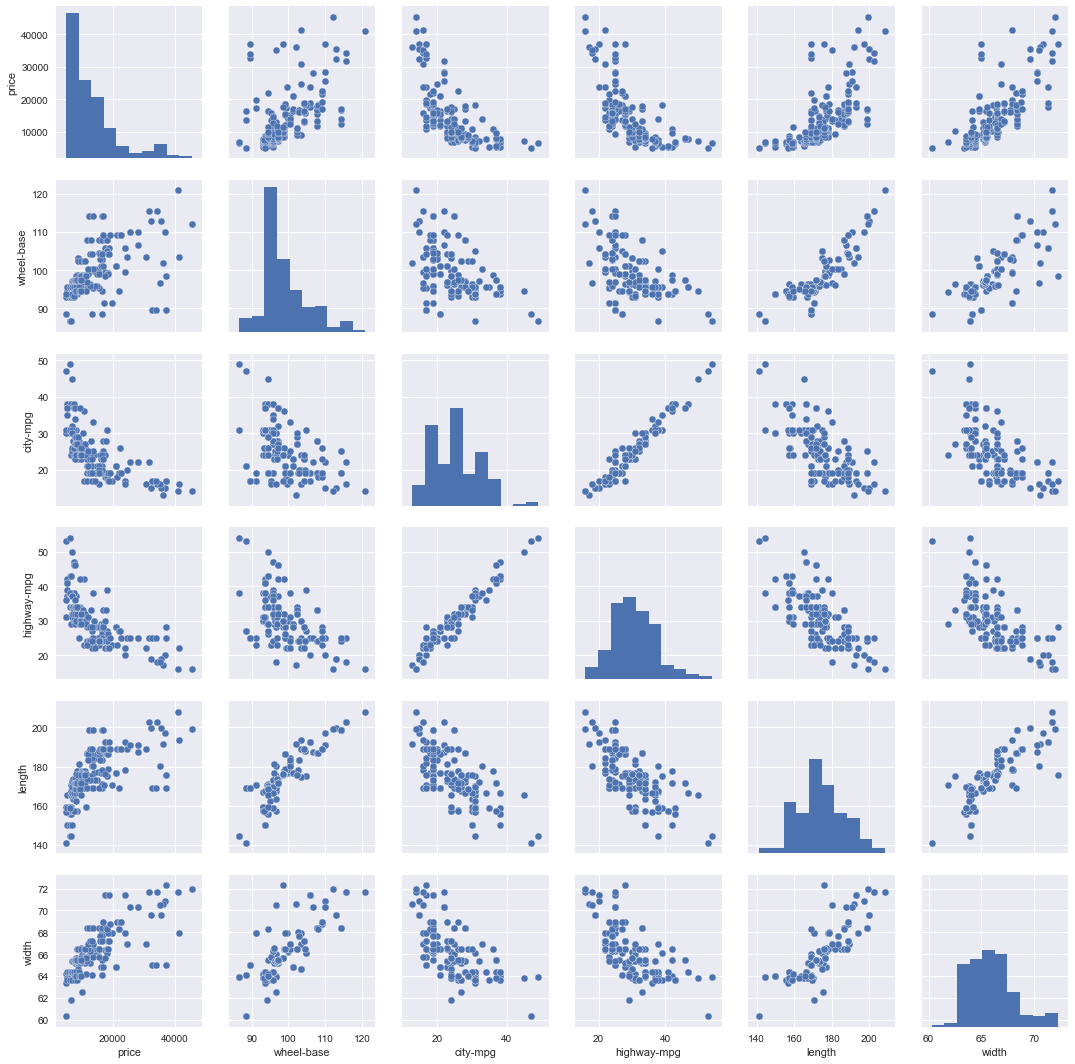

In [12]:
sns.pairplot(data[['price', 'wheel-base', 'city-mpg', 'highway-mpg', 'length', 'width']])

### **06. Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.**

**Гипотеза 01. Атмосферные двигатели по трассе расходуют столько же, сколько турбированные**

In [13]:
atmo_hw = data[data['aspiration'] == 'std']['highway-mpg'] # Только атмосферные двигатели, данные по расходу на трассе
turbo_hw = data[data['aspiration'] == 'turbo']['highway-mpg'] # Только турбированные двигатели, данные по расходу на трассе

In [14]:
# Проверим размерность и сформируем семплы

In [15]:
len(atmo_hw), len(turbo_hw)

(168, 37)

In [16]:
atmo_hw = atmo_hw.sample(35)
turbo_hw = turbo_hw.sample(35)

In [17]:
sts.ttest_ind(atmo_hw, turbo_hw, equal_var = False)

Ttest_indResult(statistic=2.5546184734524857, pvalue=0.012977853472798747)

**Гипотеза 02. Бензиновые и дизельные авто стоят одинаково**

In [18]:
price_gas = data.loc[data['fuel-type'] == 'gas', 'price'] # Только бензиновые, данные по стоимости
price_diesel = data.loc[data['fuel-type'] == 'diesel', 'price'] # Только дизельные, данные по стоимости

In [19]:
len(price_gas), len(price_diesel)

(185, 20)

In [20]:
price_gas = price_gas.sample(n=20)
price_diesel = price_diesel.sample(n=20)

In [21]:
statistics.variance(price_diesel), statistics.variance(price_gas)

(60215174.45, 48700693.46052632)

In [22]:
sts.ttest_ind(price_gas, price_diesel, equal_var = False)

Ttest_indResult(statistic=-1.44342119534775, pvalue=0.15718678570371114)

**Гипотеза 03. Бензиновые и дизельные двигатели имеют одинаковые расходы**

In [23]:
gas_city_mpg = data.loc[(data['fuel-type'] == 'gas') & (data['body-style'] == 'sedan'), 'city-mpg']
diesel_city_mpg = data.loc[(data['fuel-type'] == 'diesel') & (data['body-style'] == 'sedan'), 'city-mpg']

sts.ttest_ind(gas_city_mpg, diesel_city_mpg)

Ttest_indResult(statistic=-4.377251754522574, pvalue=3.1139745660875806e-05)

In [24]:
len(gas_city_mpg), len(diesel_city_mpg)

(81, 15)

In [25]:
gas_city_mpg = gas_city_mpg.sample(n=15)
diesel_city_mpg = diesel_city_mpg.sample(n=15)

In [26]:
statistics.variance(gas_city_mpg), statistics.variance(diesel_city_mpg)

(34.68571428571428, 39.4)

In [27]:
sts.ttest_ind(gas_city_mpg, diesel_city_mpg, equal_var = False)

Ttest_indResult(statistic=-3.599717176189513, pvalue=0.0012203319191086818)